# SMAIL AGHILAS

# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

In [1]:
import zipfile

zip_file_path = 'Dataset.zip'
extract_path = 'Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
import os
from PIL import Image

def remove(folder_path):
    for subfolder in os.listdir(folder_path):
        path = os.path.join(folder_path, subfolder)
        if os.path.isdir(path):
            for im_file in os.listdir(path):
                im_path = os.path.join(path, im_file)
                try:
                    # Essayer d'ouvrir le fichier image
                    img = Image.open(im_path)
                    img.verify()  
                except (IOError, SyntaxError) :
                    print(f"Suppression de {im_path}")
                    os.remove(im_path)

train_folder = 'Dataset/chest_xray/train'
test_folder = 'Dataset/chest_xray/test'
remove(train_folder)
remove(test_folder)


## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


In [3]:
import os

dataset_folder = 'Dataset'
for root, dirs, files in os.walk(dataset_folder):
    print(f'Dossier : {root}')


Dossier : Dataset
Dossier : Dataset\chest_xray
Dossier : Dataset\chest_xray\chest_xray
Dossier : Dataset\chest_xray\chest_xray\test
Dossier : Dataset\chest_xray\chest_xray\test\NORMAL
Dossier : Dataset\chest_xray\chest_xray\test\PNEUMONIA
Dossier : Dataset\chest_xray\chest_xray\train
Dossier : Dataset\chest_xray\chest_xray\train\NORMAL
Dossier : Dataset\chest_xray\chest_xray\train\PNEUMONIA
Dossier : Dataset\chest_xray\chest_xray\val
Dossier : Dataset\chest_xray\chest_xray\val\NORMAL
Dossier : Dataset\chest_xray\chest_xray\val\PNEUMONIA
Dossier : Dataset\chest_xray\test
Dossier : Dataset\chest_xray\test\NORMAL
Dossier : Dataset\chest_xray\test\PNEUMONIA
Dossier : Dataset\chest_xray\train
Dossier : Dataset\chest_xray\train\NORMAL
Dossier : Dataset\chest_xray\train\PNEUMONIA
Dossier : Dataset\chest_xray\train_undersampled
Dossier : Dataset\chest_xray\train_undersampled\NORMAL
Dossier : Dataset\chest_xray\train_undersampled\PNEUMONIA
Dossier : Dataset\chest_xray\val
Dossier : Dataset\ches

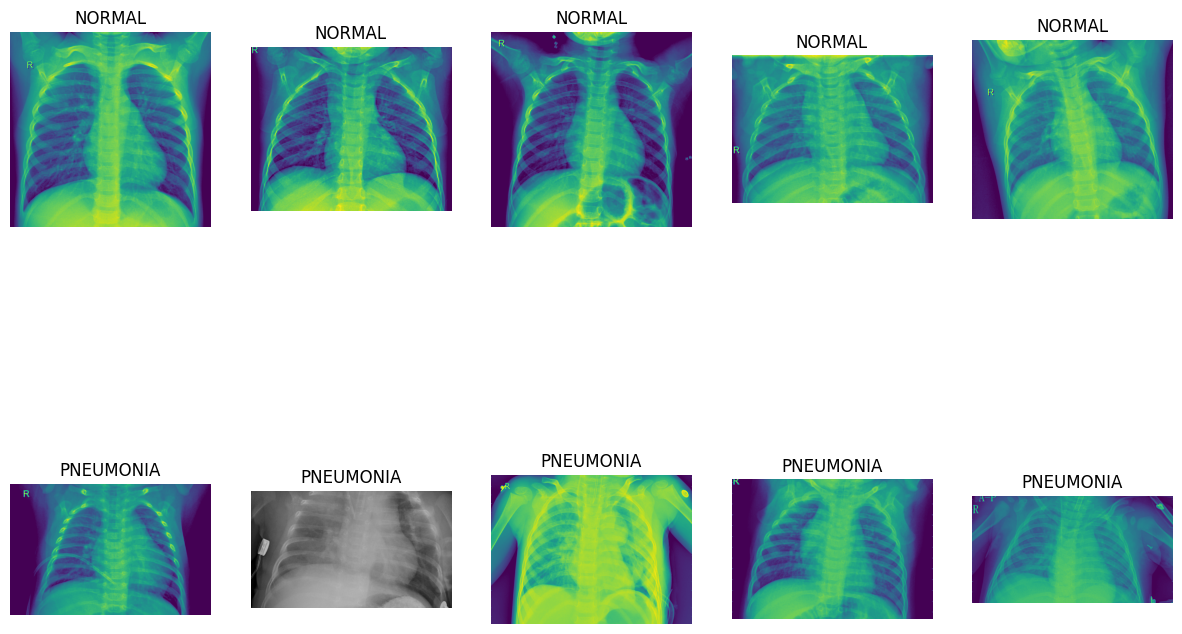

In [4]:
import os
import random
import matplotlib.pyplot as plt

def display_random_images(train_folder, num_ima=5):
    classes = os.listdir(train_folder)
    num_classes = len(classes)
    
    fig, axes = plt.subplots(num_classes, num_ima, figsize=(15, 5*num_classes))
    
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(train_folder, class_name)
        image_files = os.listdir(class_folder)
        
        random_images = random.sample(image_files, num_ima)
        
        for j, random_image in enumerate(random_images):
            image_path = os.path.join(class_folder, random_image)
            image = plt.imread(image_path)
            axes[i, j].imshow(image)
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')
    
    plt.show()

train_folder = 'Dataset/chest_xray/train'
display_random_images(train_folder)


Le nombre d images dans la classe "NORMAL" dans le TEST est : 234
Le nombre d images dans la classe "PNEUMONIA" dans le TEST est : 390


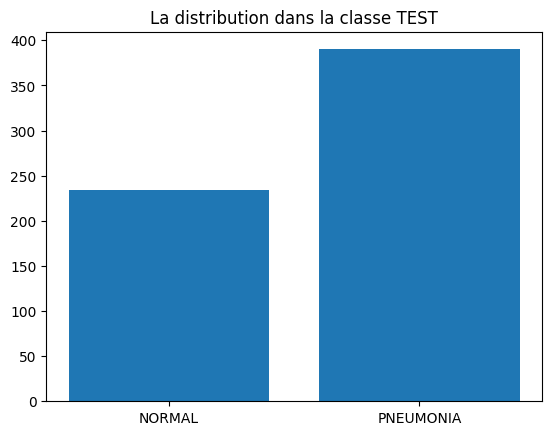

In [5]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(test_folder):
    test_c = os.listdir(test_folder)

    # Initialisez les compteurs pour chaque classe pour le test
    test = {'NORMAL': 0, 'PNEUMONIA': 0}

    # Calculer le nombre d'images pour chaque classe donnée et l'afficher pour savoir si c'est NORMAL ou PNEUMONIA
    for classN in test_c:
        class_f = os.path.join(test_folder, classN)
        image_f = os.listdir(class_f)

        if classN == 'NORMAL':
            test['NORMAL'] += len(image_f)
        elif classN == 'PNEUMONIA':
            test['PNEUMONIA'] += len(image_f)

        print(f'Le nombre d images dans la classe "{classN}" dans le TEST est : {len(image_f)}')

    # Afficher la distribution des classes dans le répertoire de test
    plt.bar(test.keys(), test.values())
    plt.title('La distribution dans la classe TEST')
    plt.show()

test_folder = 'Dataset/chest_xray/test'
plot_class_distribution(test_folder)


## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


In [15]:
import glob
import pandas as pd
import numpy as np
import cv2


In [16]:
main_path = "Dataset/chest_xray"
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal=glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia=glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [17]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list=[x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val=pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [18]:
import PIL
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

In [19]:
from sklearn import preprocessing
import numpy as np
def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  
    return image

# Prétraitement des données d'entraînement, de test et de validation
X_train = np.array([preprocess_image(img_path) for img_path in df_train['image']])
X_test = np.array([preprocess_image(img_path) for img_path in df_test['image']])
X_val = np.array([preprocess_image(img_path) for img_path in df_val['image']])

y_train = df_train['class'].values
y_test = df_test['class'].values
y_val = df_val['class'].values

In [20]:
print(y_train[:5])
print(y_test[:5])
print(y_val[:5])


['Normal' 'Normal' 'Normal' 'Normal' 'Normal']
['Normal' 'Normal' 'Normal' 'Normal' 'Normal']
['Normal' 'Normal' 'Normal' 'Normal' 'Normal']


In [21]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred = svm_model.predict(X_test.reshape(X_test.shape[0], -1))


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.35      0.51       234
   Pneumonia       0.72      0.99      0.83       390

    accuracy                           0.75       624
   macro avg       0.84      0.67      0.67       624
weighted avg       0.81      0.75      0.71       624



## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


In [22]:
from sklearn.preprocessing import LabelEncoder

# Créez un objet LabelEncoder
label_encoder = LabelEncoder()

# Encodez les étiquettes d'entraînement, de test et de validation en format numérique
y1_train = label_encoder.fit_transform(y_train)
y1_test = label_encoder.transform(y_test)
y1_val = label_encoder.transform(y_val)

In [24]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import layers, models

# Création du modèle CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])
# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

In [3]:

# Entraînement du modèle
history = model.fit(X_train, y1_train, epochs=5, validation_data=(X_val, y1_val))

# Évaluation du modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y1_test)
print(f'Accuracy on test data: {test_acc}')

NameError: name 'model' is not defined

In [26]:
print(f'Accuracy on test data: {test_acc}')
print(f'loss on test data: {test_loss}')

Accuracy on test data: 0.6987179517745972
loss on test data: 1.422726035118103


In [1]:
model.save('Aghilas_modele.h5')

NameError: name 'model' is not defined

In [33]:
from tensorflow.keras.models import load_model

loaded_model = load_model('../Aghilas_modele.h5')


## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:

# Your code here for Model Evaluation


## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [ ]:

# Your code here for Model Deployment (Bonus)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.


